Found 2174 images belonging to 2 classes.
Found 2175 images belonging to 2 classes.
Epoch 1/10
68/68 [==============================] - 43s 615ms/step - loss: 0.3242 - accuracy: 0.8790 - val_loss: 0.1815 - val_accuracy: 0.9113
Epoch 2/10
68/68 [==============================] - 30s 439ms/step - loss: 0.1899 - accuracy: 0.9131 - val_loss: 0.1507 - val_accuracy: 0.9453
Epoch 3/10
68/68 [==============================] - 30s 442ms/step - loss: 0.1583 - accuracy: 0.9255 - val_loss: 0.1265 - val_accuracy: 0.9476
Epoch 4/10
68/68 [==============================] - 30s 438ms/step - loss: 0.1519 - accuracy: 0.9246 - val_loss: 0.1209 - val_accuracy: 0.9439
Epoch 5/10
68/68 [==============================] - 30s 442ms/step - loss: 0.1475 - accuracy: 0.9370 - val_loss: 0.1109 - val_accuracy: 0.9563
Epoch 6/10
68/68 [==============================] - 31s 449ms/step - loss: 0.1327 - accuracy: 0.9462 - val_loss: 0.1106 - val_accuracy: 0.9462
Epoch 7/10
68/68 [==============================] - 30s 44

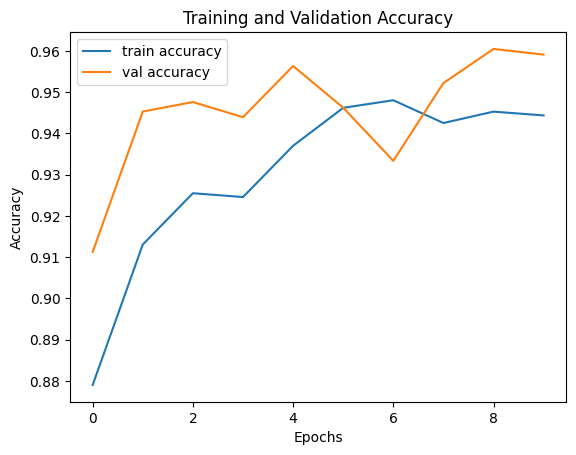

In [3]:
# Step 1: Import Required Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Step 2: Define Paths
train_dir = 'eyeglass_dataset/train'
val_dir = 'eyeglass_dataset/valid'

# Step 3: Data Preprocessing
image_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, shear_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=image_size,
                                               batch_size=batch_size,
                                               class_mode='binary')

val_data = val_datagen.flow_from_directory(val_dir,
                                           target_size=image_size,
                                           batch_size=batch_size,
                                           class_mode='binary')

# Step 4: Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the Model
history = model.fit(train_data,
                    epochs=10,
                    validation_data=val_data)

# Step 7: Evaluate the Model
loss, acc = model.evaluate(val_data)
print(f"Validation Accuracy: {acc*100:.2f}%")

# Step 8: Plot Training History
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()